In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
train_path='C:/Users/abhi8/Downloads/archive (7)/chest_xray/train'
test_path='C:/Users/abhi8/Downloads/archive (7)/chest_xray/test'
val_path='C:/Users/abhi8/Downloads/archive (7)/chest_xray/val'

In [3]:
IMAGE_SIZE = [224, 224]

# Set the batch size
BATCH_SIZE = 32  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS = 5
LEARNING_RATE = 0.0001
NUM_CLASSES = 2 # We are aware of it.

In [4]:
import os
CLASSES = os.listdir(train_path)
NUM_CLASSES = len(CLASSES)

In [5]:
print("Class --> {} \n and the length is : {}".format(CLASSES, NUM_CLASSES))

Class --> ['NORMAL', 'PNEUMONIA'] 
 and the length is : 2


In [6]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [7]:
training_set = train_datagen.flow_from_directory(
    directory = train_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 5216 images belonging to 2 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
test_set = test_datagen.flow_from_directory(
    directory = test_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 624 images belonging to 2 classes.


In [10]:
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 7s 0us/step


In [11]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [12]:
x = Flatten()(vgg.output)

prediction = Dense(NUM_CLASSES, activation='softmax')(x)

In [13]:
model = Model(inputs=vgg.input, outputs=prediction)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
163/163 [==============================] - 966s 6s/step - loss: 0.2115 - accuracy: 0.9137 - val_loss: 0.2318 - val_accuracy: 0.9231
Epoch 2/5
163/163 [==============================] - 969s 6s/step - loss: 0.1120 - accuracy: 0.9561 - val_loss: 0.7836 - val_accuracy: 0.7740
Epoch 3/5
163/163 [==============================] - 954s 6s/step - loss: 0.1012 - accuracy: 0.9624 - val_loss: 0.2227 - val_accuracy: 0.9199
Epoch 4/5
163/163 [==============================] - 915s 6s/step - loss: 0.0975 - accuracy: 0.9643 - val_loss: 0.3540 - val_accuracy: 0.9119
Epoch 5/5
163/163 [==============================] - 953s 6s/step - loss: 0.0822 - accuracy: 0.9703 - val_loss: 0.3137 - val_accuracy: 0.9151


In [17]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_set = validation_datagen.flow_from_directory(
    directory = val_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 16 images belonging to 2 classes.


In [18]:
validation_steps = 10

loss0,accuracy0 = model.evaluate(validation_set, steps = validation_steps)

print("loss: {:.2f}".format(loss0))
print("accuracy: {:.2f}".format(accuracy0))

10/10 [==============================] - 5s 249ms/step - loss: 0.3564 - accuracy: 0.8125
loss: 0.36
accuracy: 0.81


In [19]:
validation_set2 = validation_datagen.flow_from_directory(
    directory = val_path,
    target_size = (224, 224),
    batch_size = 1,
    shuffle=False, 
    seed=42, 
    class_mode="binary"
)


Found 16 images belonging to 2 classes.


In [20]:
val = model.evaluate(validation_set, steps = validation_steps)

print("loss: {:.2f}".format(val[0]))
print("accuracy: {:.2f}".format(val[1]))

10/10 [==============================] - 3s 6ms/step - loss: 0.3564 - accuracy: 0.8125
loss: 0.36
accuracy: 0.81


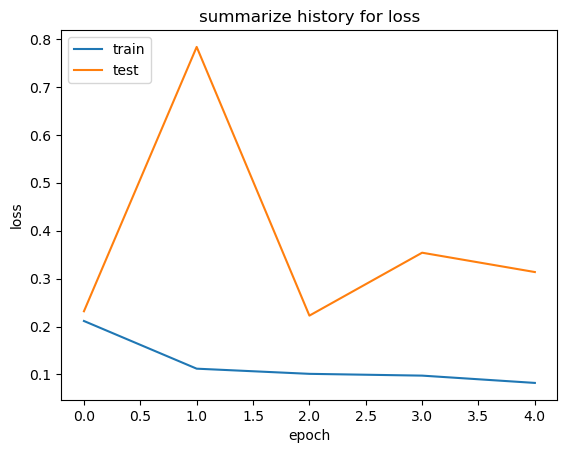

In [21]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation (Test) loss')
plt.title('summarize history for loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


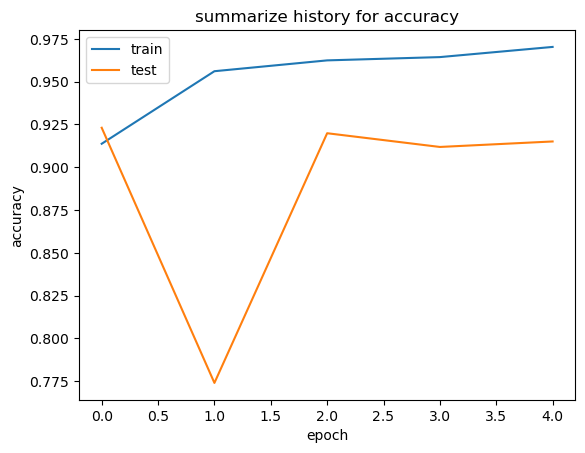

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('summarize history for accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
from tensorflow.keras.preprocessing import image

In [25]:
img_normal = image.load_img('C:/Users/abhi8/Downloads/archive (7)/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg', target_size = (224, 224))
img_pneumonia = image.load_img('C:/Users/abhi8/Downloads/archive (7)/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg', target_size = (224, 224))

In [26]:
def model_predict(img, actual):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x_processed = preprocess_input(x)
    result = model.predict(x_processed)
    if(result[0][0]<.50):
        result="normal"
    else:
        result="pneumonia"
        
    plt.figure()
    plt.imshow(img)
    plt.title('Actual : {} --> Predicted  : {}'.format(actual, result))

1/1 [==============================] - 0s 203ms/step


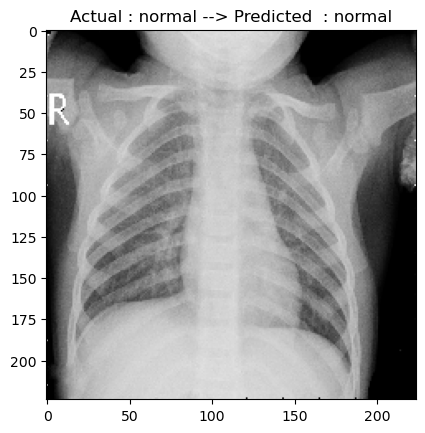

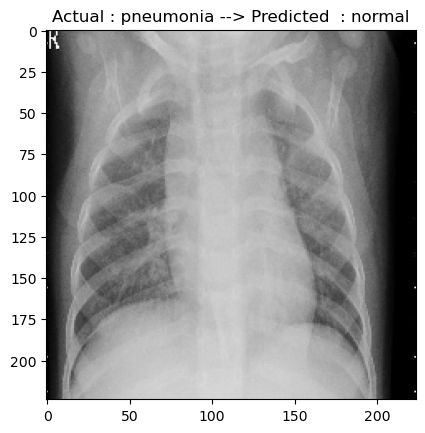

In [27]:
pred_normal = model_predict(img_normal, "normal")
pred_pneumonia = model_predict(img_pneumonia, "pneumonia")

1/1 [==============================] - 0s 234ms/step


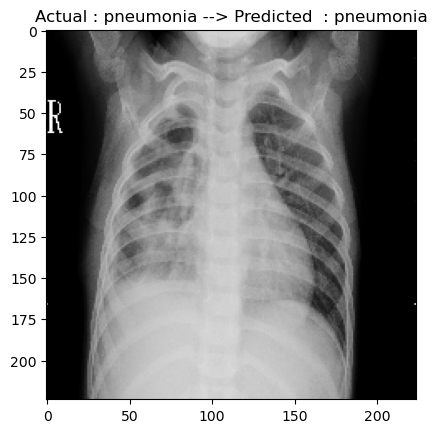

In [28]:
img = image.load_img('C:/Users/abhi8/Downloads/archive (7)/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg', target_size = (224, 224))

pred = model_predict(img, "pneumonia")